In [1]:
%matplotlib inline

In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from skimage.io import imread, imread_collection, imshow, imshow_collection
from skimage.filters import threshold_otsu
from skimage.transform import resize, rotate

from scipy.signal import convolve2d
from scipy.fft import fft2, fftshift

# Working with Images 

In [3]:
cat_image = imread("cats/domestic-cat/dc (17).jpg")

In [4]:
cat_image.shape

(183, 275, 3)

In [5]:
cat_image[:, :, 0]

array([[ 64,  59,  51, ...,  39,  39,  39],
       [ 58,  55,  49, ...,  39,  39,  39],
       [ 50,  49,  46, ...,  37,  37,  37],
       ...,
       [118, 117, 124, ..., 164, 178, 190],
       [131, 125, 125, ..., 172, 186, 199],
       [139, 132, 129, ..., 177, 191, 203]], dtype=uint8)

In [6]:
imread_collection("cats/domestic-cat/*")

In [7]:
all_domestic_cats = imread_collection("cats/domestic-cat/*")

In [8]:
domestic_cats = list(all_domestic_cats)

In [9]:
len(domestic_cats)

64

In [10]:
domestic_cats[16] == cat_image

array([[[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       ...,

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,

In [11]:
(domestic_cats[16] == cat_image).all()

True

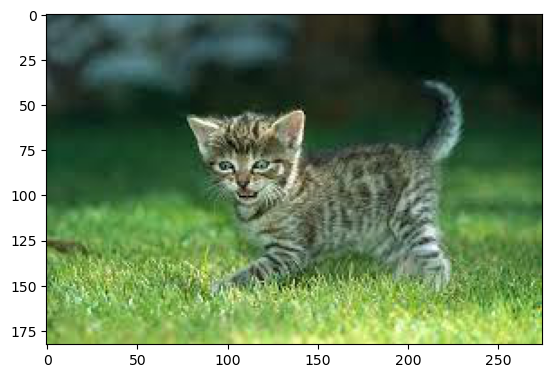

In [12]:
plt.imshow(cat_image)

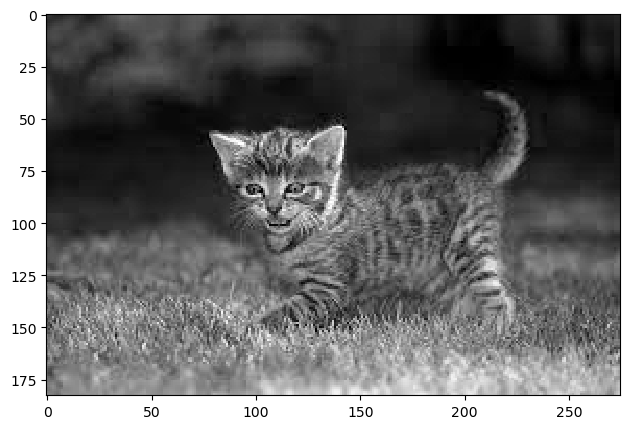

In [13]:
imshow(cat_image[:, :, 0]) # red canal

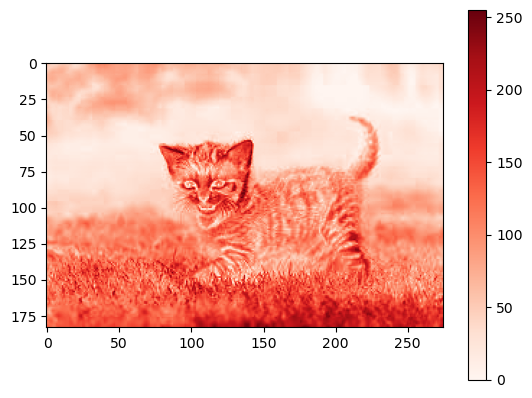

In [14]:
plt.imshow(cat_image[:, :, 0], cmap = "Reds")  # in plt the result is not the same. When plt recieves a 2d image (i.e. without canals) it thinks that it is a heatmap
plt.colorbar()

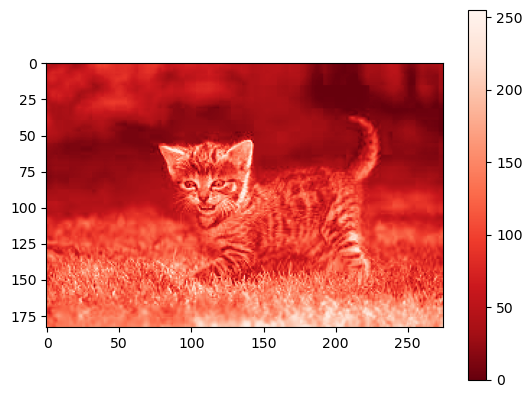

In [15]:
plt.imshow(cat_image[:, :, 0], cmap = "Reds_r")  # "Reds_r" -> reds reverse
plt.colorbar()

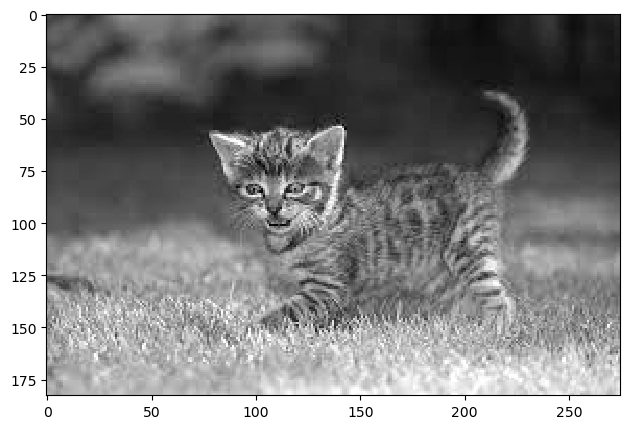

In [16]:
imshow(cat_image[:, :, 1]) # green canal

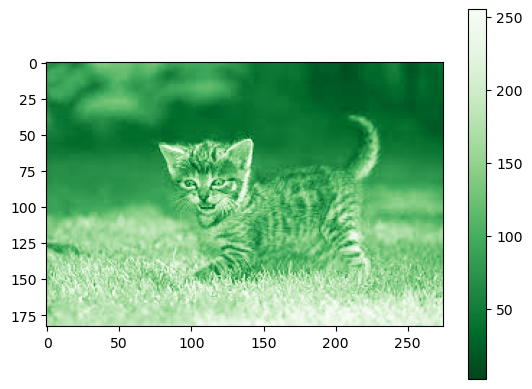

In [17]:
plt.imshow(cat_image[:, :, 1], cmap = "Greens_r")  
plt.colorbar()

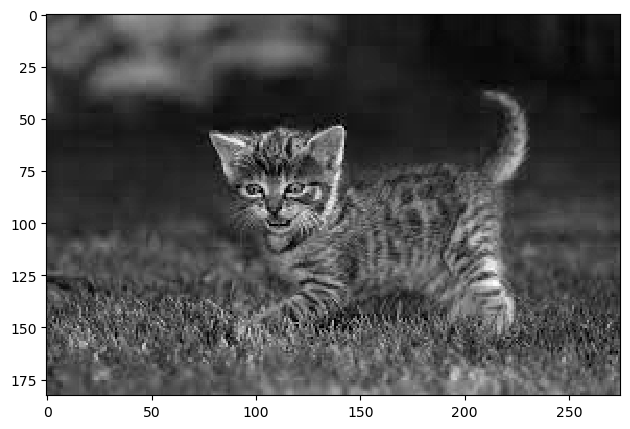

In [18]:
imshow(cat_image[:, :, 2]) # blue canal

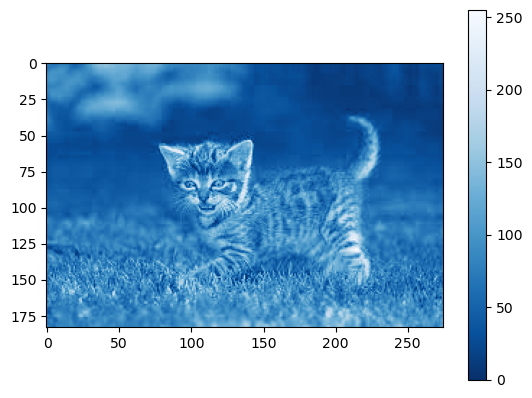

In [19]:
plt.imshow(cat_image[:, :, 2], cmap = "Blues_r")  
plt.colorbar()

### Slicing

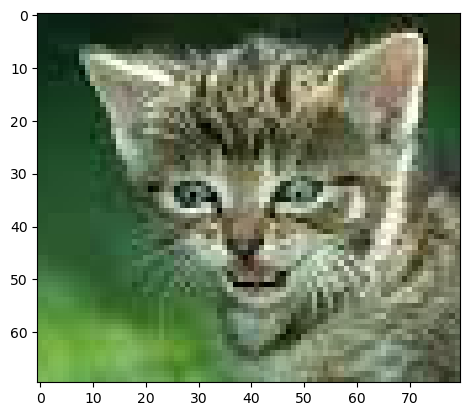

In [20]:
plt.imshow(cat_image[50:120, 70:150, :])

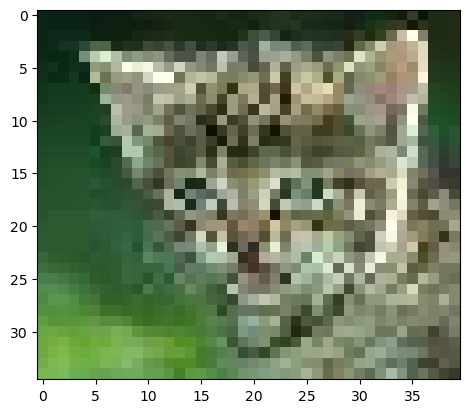

In [21]:
# downsampling
plt.imshow(cat_image[50:120:2, 70:150:2]) # it is 4 times as small as the original

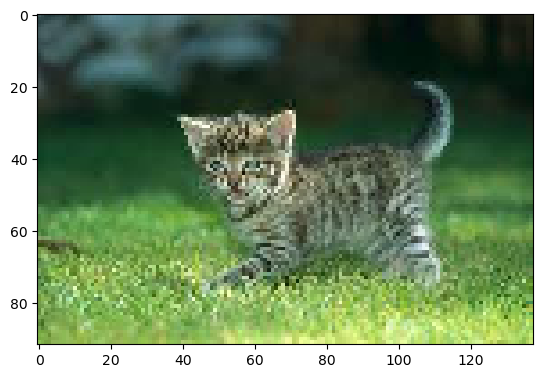

In [22]:
plt.imshow(cat_image[::2, ::2])

In [23]:
cat_image.dtype

dtype('uint8')

In [24]:
cat_image.astype(float)

array([[[ 64.,  88.,  90.],
        [ 59.,  83.,  85.],
        [ 51.,  75.,  77.],
        ...,
        [ 39.,  41.,  27.],
        [ 39.,  41.,  27.],
        [ 39.,  41.,  27.]],

       [[ 58.,  82.,  84.],
        [ 55.,  79.,  81.],
        [ 49.,  73.,  75.],
        ...,
        [ 39.,  41.,  27.],
        [ 39.,  41.,  27.],
        [ 39.,  41.,  27.]],

       [[ 50.,  74.,  76.],
        [ 49.,  73.,  75.],
        [ 46.,  70.,  72.],
        ...,
        [ 37.,  39.,  25.],
        [ 37.,  39.,  25.],
        [ 37.,  39.,  25.]],

       ...,

       [[118., 169.,  64.],
        [117., 168.,  65.],
        [124., 172.,  70.],
        ...,
        [164., 201.,  85.],
        [178., 215.,  99.],
        [190., 227., 111.]],

       [[131., 182.,  77.],
        [125., 176.,  73.],
        [125., 173.,  71.],
        ...,
        [172., 207.,  91.],
        [186., 221., 105.],
        [199., 234., 118.]],

       [[139., 190.,  85.],
        [132., 183.,  80.],
        [129., 1

In [25]:
(cat_image + 500).astype("uint8")

array([[[ 52,  76,  78],
        [ 47,  71,  73],
        [ 39,  63,  65],
        ...,
        [ 27,  29,  15],
        [ 27,  29,  15],
        [ 27,  29,  15]],

       [[ 46,  70,  72],
        [ 43,  67,  69],
        [ 37,  61,  63],
        ...,
        [ 27,  29,  15],
        [ 27,  29,  15],
        [ 27,  29,  15]],

       [[ 38,  62,  64],
        [ 37,  61,  63],
        [ 34,  58,  60],
        ...,
        [ 25,  27,  13],
        [ 25,  27,  13],
        [ 25,  27,  13]],

       ...,

       [[106, 157,  52],
        [105, 156,  53],
        [112, 160,  58],
        ...,
        [152, 189,  73],
        [166, 203,  87],
        [178, 215,  99]],

       [[119, 170,  65],
        [113, 164,  61],
        [113, 161,  59],
        ...,
        [160, 195,  79],
        [174, 209,  93],
        [187, 222, 106]],

       [[127, 178,  73],
        [120, 171,  68],
        [117, 165,  63],
        ...,
        [165, 198,  83],
        [179, 212,  97],
        [191, 224, 109]]

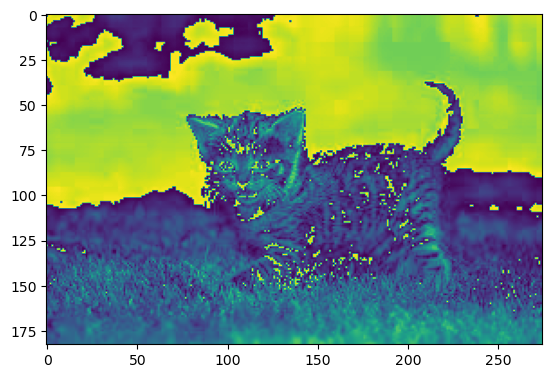

In [26]:
plt.imshow((cat_image[:, :, 0] + 200).astype("uint8")) 

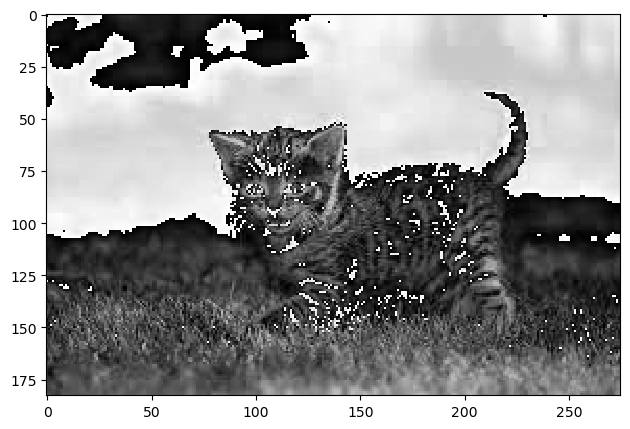

In [27]:
# image solarization
imshow((cat_image[:, :, 0] + 200).astype("uint8")) 

C:\Users\diton\anaconda3\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:149: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


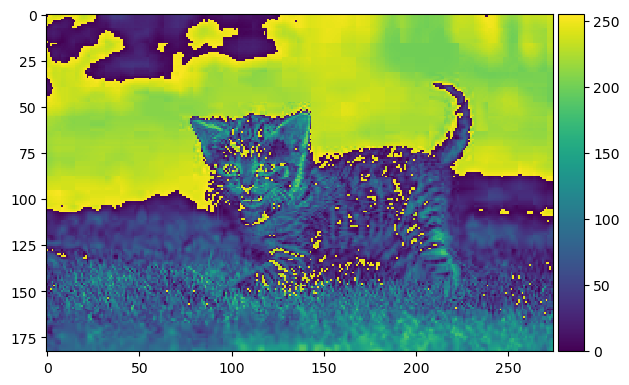

In [28]:
imshow((cat_image[:, :, 0] + 200) % 256) 

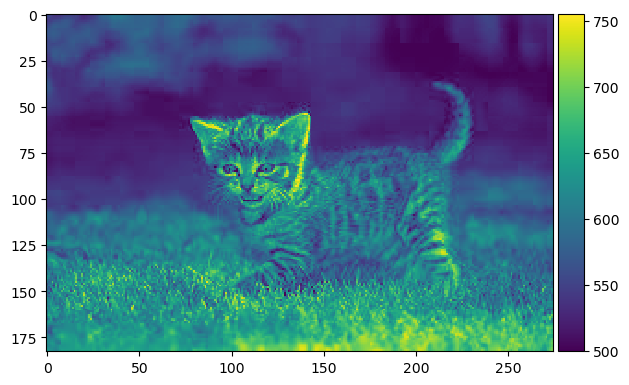

In [29]:
imshow((cat_image[:, :, 0] + 500))

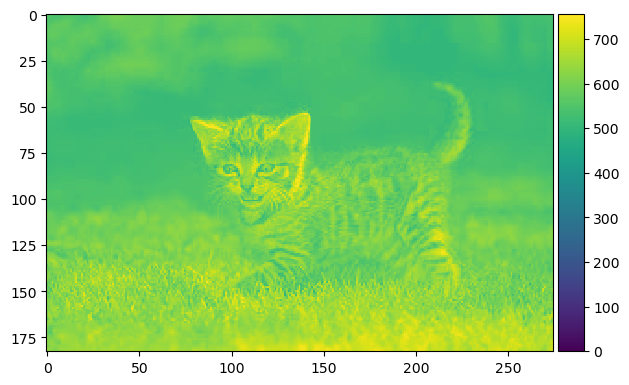

In [30]:
imshow((cat_image[:, :, 0] + 500), vmin = 0, vmax = 500 + 256)

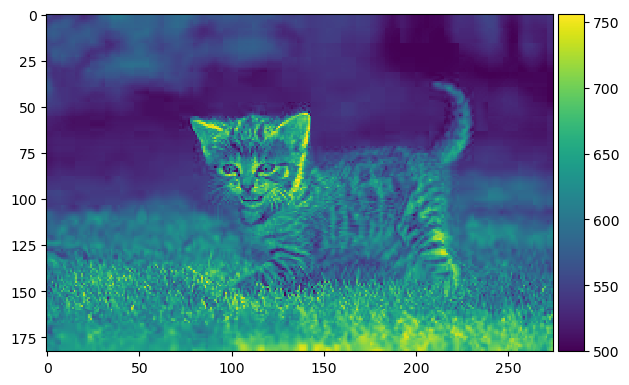

In [31]:
imshow((cat_image[:, :, 0] + 500), vmin = 500, vmax = 500 + 256)

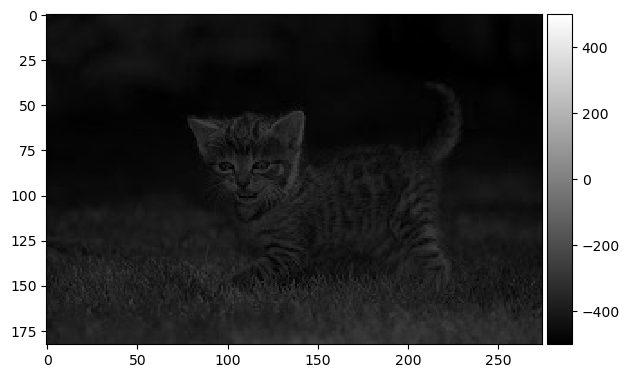

In [32]:
imshow((cat_image[:, :, 0].astype(int) - 500), cmap = "gray")

In [33]:
cat_image[:, :, 0].astype(int) - 500

array([[-436, -441, -449, ..., -461, -461, -461],
       [-442, -445, -451, ..., -461, -461, -461],
       [-450, -451, -454, ..., -463, -463, -463],
       ...,
       [-382, -383, -376, ..., -336, -322, -310],
       [-369, -375, -375, ..., -328, -314, -301],
       [-361, -368, -371, ..., -323, -309, -297]])

In [34]:
cat_image[:, :, 0].astype(float) - 500

array([[-436., -441., -449., ..., -461., -461., -461.],
       [-442., -445., -451., ..., -461., -461., -461.],
       [-450., -451., -454., ..., -463., -463., -463.],
       ...,
       [-382., -383., -376., ..., -336., -322., -310.],
       [-369., -375., -375., ..., -328., -314., -301.],
       [-361., -368., -371., ..., -323., -309., -297.]])

In [35]:
cat_image[:, :, 0].ravel() # all rows go on one row one after another

array([ 64,  59,  51, ..., 177, 191, 203], dtype=uint8)

In [36]:
cat_image[:, :, 0].ravel().shape # such a shape (1213232, ) cannot be trasposed

(50325,)

In [37]:
cat_image[:, :, 0].shape[:2]

(183, 275)

In [38]:
183 * 275

50325

In [39]:
cat_image[:, :, 0].reshape(-1, 1).shape

(50325, 1)

In [40]:
red_channel_for_hist = cat_image[:, :, 0].ravel()
green_channel_for_hist = cat_image[:, :, 1].ravel()
blue_channel_for_hist = cat_image[:, :, 2].ravel()

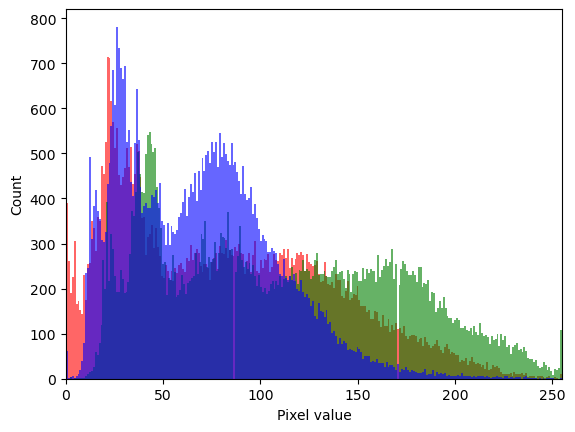

In [41]:
plt.hist(red_channel_for_hist, bins = 256, color = "red", alpha = 0.6)
plt.hist(green_channel_for_hist, bins = 256, color = "green", alpha = 0.6)
plt.hist(blue_channel_for_hist, bins = 256, color = "blue", alpha = 0.6)

plt.xlabel("Pixel value")
plt.ylabel("Count")

plt.xlim(0, 255)
plt.show()

### Second image

In [42]:
cat_image = imread("cats/domestic-cat/dc (58).jpg")

In [43]:
cat_image.shape

(183, 275, 3)

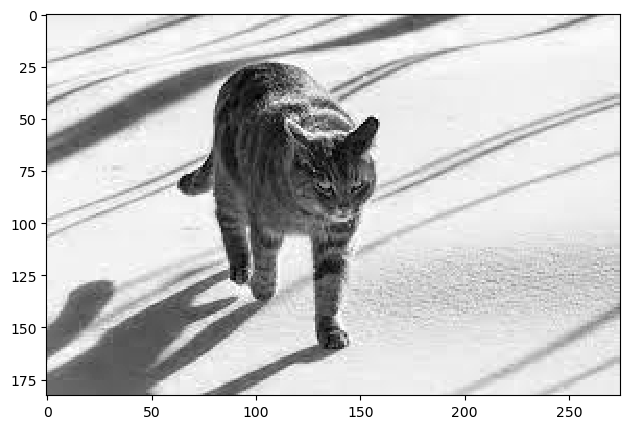

In [44]:
imshow(cat_image[:, :, 0]) # red canal

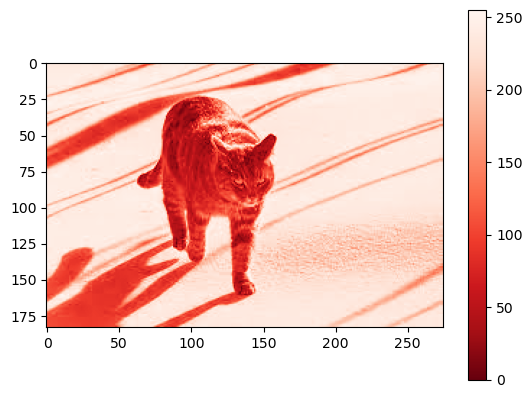

In [45]:
plt.imshow(cat_image[:, :, 0], cmap = "Reds_r")  # "Reds_r" -> reds reverse
plt.colorbar()

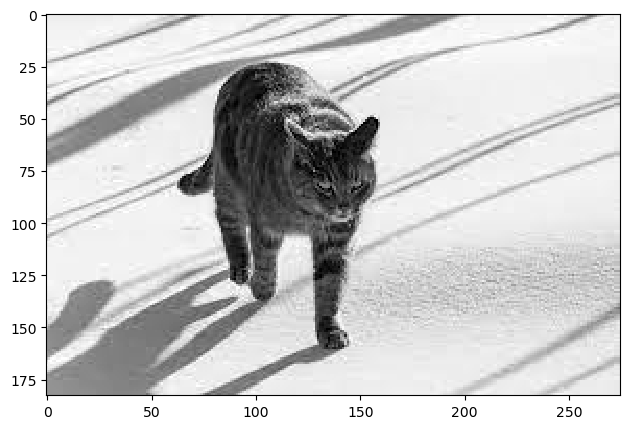

In [46]:
imshow(cat_image[:, :, 1]) # green canal

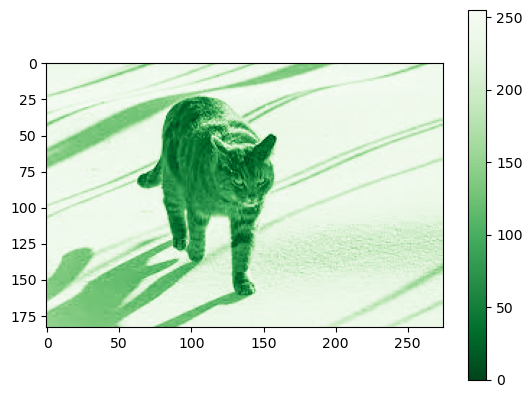

In [47]:
plt.imshow(cat_image[:, :, 1], cmap = "Greens_r")  
plt.colorbar()

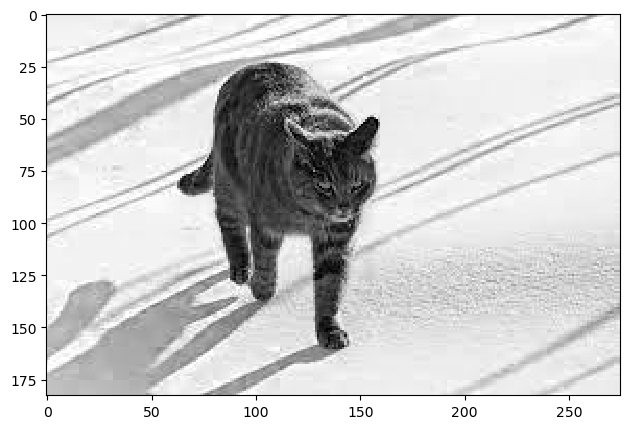

In [48]:
imshow(cat_image[:, :, 2]) # blue canal

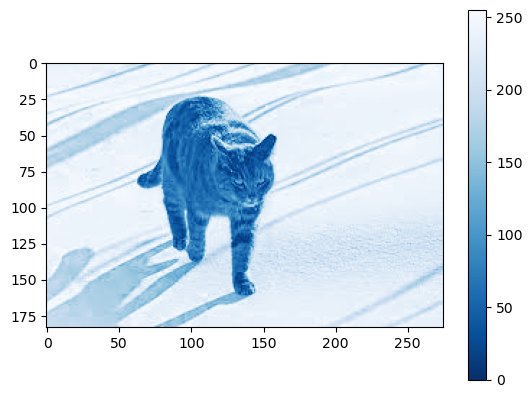

In [49]:
plt.imshow(cat_image[:, :, 2], cmap = "Blues_r")  
plt.colorbar()

In [50]:
red_channel_for_hist = cat_image[:, :, 0].ravel()
green_channel_for_hist = cat_image[:, :, 1].ravel()
blue_channel_for_hist = cat_image[:, :, 2].ravel()

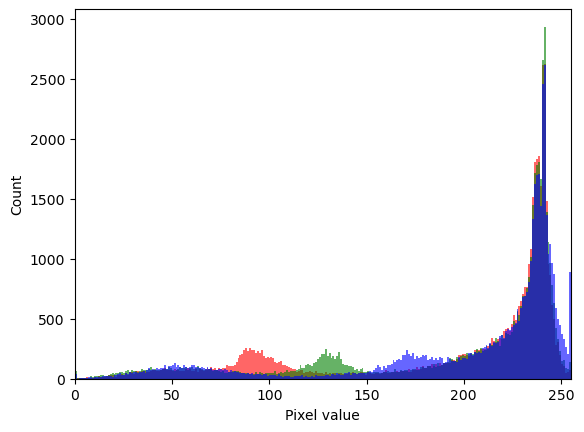

In [51]:
plt.hist(red_channel_for_hist, bins = 256, color = "red", alpha = 0.6)
plt.hist(green_channel_for_hist, bins = 256, color = "green", alpha = 0.6)
plt.hist(blue_channel_for_hist, bins = 256, color = "blue", alpha = 0.6)

plt.xlabel("Pixel value")
plt.ylabel("Count")

plt.xlim(0, 255)
plt.show()

#### overlapping values of the three colors is gray

### Third image

In [52]:
cat_image = imread("cats/domestic-cat/dc (21).jpg")

In [53]:
cat_image.shape

(183, 275, 3)

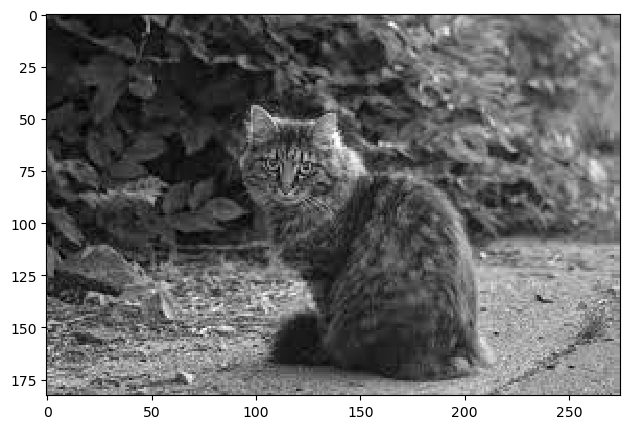

In [54]:
imshow(cat_image[:, :, 0]) # red canal

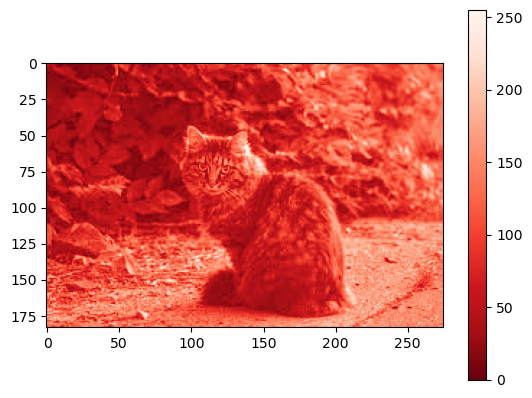

In [55]:
plt.imshow(cat_image[:, :, 0], cmap = "Reds_r")  # "Reds_r" -> reds reverse
plt.colorbar()

In [56]:
red_channel_for_hist = cat_image[:, :, 0].ravel()
green_channel_for_hist = cat_image[:, :, 1].ravel()
blue_channel_for_hist = cat_image[:, :, 2].ravel()

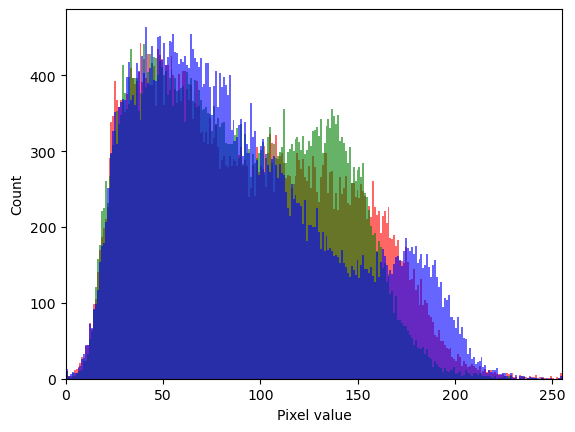

In [57]:
plt.hist(red_channel_for_hist, bins = 256, color = "red", alpha = 0.6)
plt.hist(green_channel_for_hist, bins = 256, color = "green", alpha = 0.6)
plt.hist(blue_channel_for_hist, bins = 256, color = "blue", alpha = 0.6)

plt.xlabel("Pixel value")
plt.ylabel("Count")

plt.xlim(0, 255)
plt.show()

### Image calculations

In [58]:
cat_image = imread("cats/domestic-cat/dc (17).jpg")

In [59]:
cat_image.mean(axis = 0) # mean by rows

array([[ 66.02185792, 101.07650273,  60.72131148],
       [ 66.2568306 , 101.36065574,  60.97814208],
       [ 67.40437158, 102.3989071 ,  61.8852459 ],
       [ 68.50819672, 103.52459016,  62.89071038],
       [ 68.4863388 , 103.54644809,  62.75409836],
       [ 69.63387978, 104.57923497,  63.67213115],
       [ 69.12568306, 104.1420765 ,  62.86338798],
       [ 69.12021858, 104.32786885,  62.66666667],
       [ 69.49726776, 104.62295082,  62.96174863],
       [ 70.6557377 , 105.86885246,  64.01092896],
       [ 70.82513661, 106.21311475,  64.31147541],
       [ 72.72131148, 107.98360656,  66.01092896],
       [ 71.79234973, 107.27868852,  65.18032787],
       [ 69.84153005, 105.40983607,  63.18032787],
       [ 69.27322404, 104.97814208,  62.75956284],
       [ 70.95081967, 106.53551913,  64.36065574],
       [ 73.6557377 , 110.1420765 ,  66.61202186],
       [ 71.19672131, 107.70491803,  63.93989071],
       [ 70.59016393, 107.16939891,  62.74863388],
       [ 71.60655738, 108.18032

In [60]:
cat_image.mean(axis = 0).shape

(275, 3)

In [61]:
cat_image.mean(axis = 1) # mean by columns

array([[ 50.28363636,  67.61090909,  62.18181818],
       [ 49.89454545,  67.12727273,  61.71272727],
       [ 49.07272727,  66.31272727,  60.85818182],
       [ 48.29818182,  65.29818182,  59.72727273],
       [ 47.47272727,  64.28      ,  58.69090909],
       [ 46.69818182,  63.22181818,  57.52      ],
       [ 45.74181818,  62.16363636,  56.53454545],
       [ 45.20727273,  61.53090909,  55.78909091],
       [ 43.77818182,  59.94909091,  54.18181818],
       [ 43.12      ,  59.45090909,  53.70181818],
       [ 42.21090909,  58.61090909,  52.90909091],
       [ 41.47272727,  57.92727273,  52.18181818],
       [ 40.96363636,  57.61454545,  51.92727273],
       [ 40.74909091,  57.50545455,  51.86181818],
       [ 40.57818182,  57.6       ,  51.98545455],
       [ 40.52363636,  57.65090909,  52.05090909],
       [ 39.20727273,  58.38181818,  53.26181818],
       [ 39.2       ,  58.43272727,  53.31272727],
       [ 39.14909091,  58.46909091,  53.27272727],
       [ 38.93454545,  58.48363

In [62]:
cat_image.mean(axis = 1).shape

(183, 3)

In [63]:
cat_image.mean(axis = 2) # mean by color

array([[ 80.66666667,  75.66666667,  67.66666667, ...,  35.66666667,
         35.66666667,  35.66666667],
       [ 74.66666667,  71.66666667,  65.66666667, ...,  35.66666667,
         35.66666667,  35.66666667],
       [ 66.66666667,  65.66666667,  62.66666667, ...,  33.66666667,
         33.66666667,  33.66666667],
       ...,
       [117.        , 116.66666667, 122.        , ..., 150.        ,
        164.        , 176.        ],
       [130.        , 124.66666667, 123.        , ..., 156.66666667,
        170.66666667, 183.66666667],
       [138.        , 131.66666667, 127.        , ..., 160.66666667,
        174.66666667, 186.66666667]])

In [64]:
cat_image.mean(axis = 2).shape

(183, 275)

C:\Users\diton\anaconda3\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:149: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


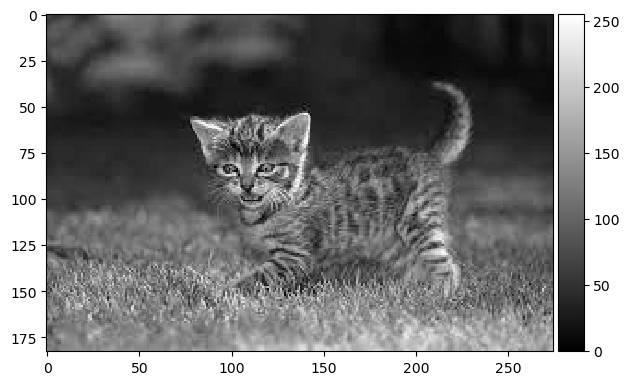

In [65]:
imshow(cat_image.mean(axis = 2), cmap = "gray", vmin = 0, vmax = 255)

In [66]:
red = cat_image[:, :, 0]
green = cat_image[:, :, 1]
blue = cat_image[:, :, 2]


cat_image_gray = 0.299 * red + 0.587 * green + 0.114 * blue # gamma-correction. Up to 1. If the sum of the three coefficints is more than 1, the contrast changes.

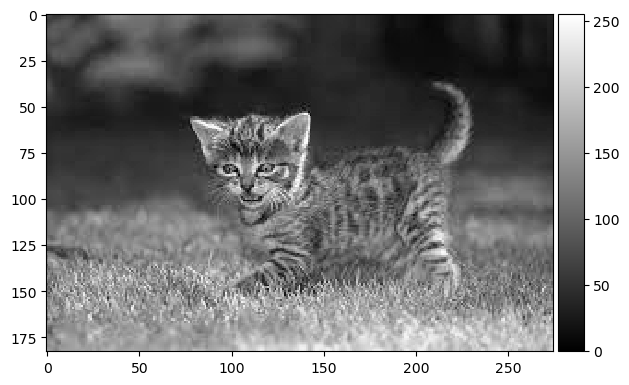

In [67]:
imshow(cat_image_gray, cmap = "gray", vmin = 0, vmax = 255)

### blurring

In [68]:
cat_image_masked = cat_image.copy()

In [69]:
cat_image_masked[50:120, 70:150] = 0

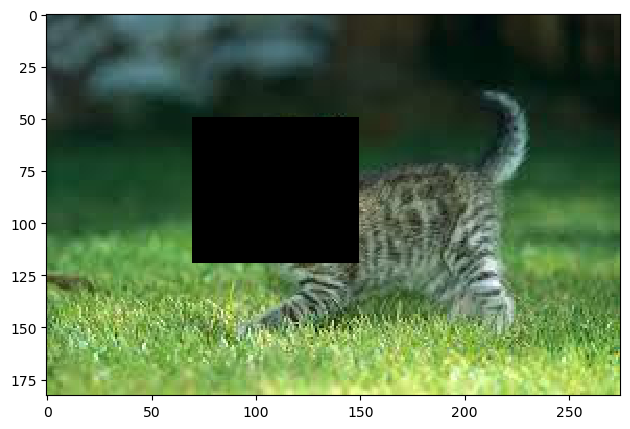

In [70]:
imshow(cat_image_masked)

### Normalization of image

In [71]:
(cat_image / 255)

array([[[0.25098039, 0.34509804, 0.35294118],
        [0.23137255, 0.3254902 , 0.33333333],
        [0.2       , 0.29411765, 0.30196078],
        ...,
        [0.15294118, 0.16078431, 0.10588235],
        [0.15294118, 0.16078431, 0.10588235],
        [0.15294118, 0.16078431, 0.10588235]],

       [[0.22745098, 0.32156863, 0.32941176],
        [0.21568627, 0.30980392, 0.31764706],
        [0.19215686, 0.28627451, 0.29411765],
        ...,
        [0.15294118, 0.16078431, 0.10588235],
        [0.15294118, 0.16078431, 0.10588235],
        [0.15294118, 0.16078431, 0.10588235]],

       [[0.19607843, 0.29019608, 0.29803922],
        [0.19215686, 0.28627451, 0.29411765],
        [0.18039216, 0.2745098 , 0.28235294],
        ...,
        [0.14509804, 0.15294118, 0.09803922],
        [0.14509804, 0.15294118, 0.09803922],
        [0.14509804, 0.15294118, 0.09803922]],

       ...,

       [[0.4627451 , 0.6627451 , 0.25098039],
        [0.45882353, 0.65882353, 0.25490196],
        [0.48627451, 0

In [72]:
(cat_image / 255).dtype

dtype('float64')

In [73]:
cat_image_normalized = cat_image / 255.0

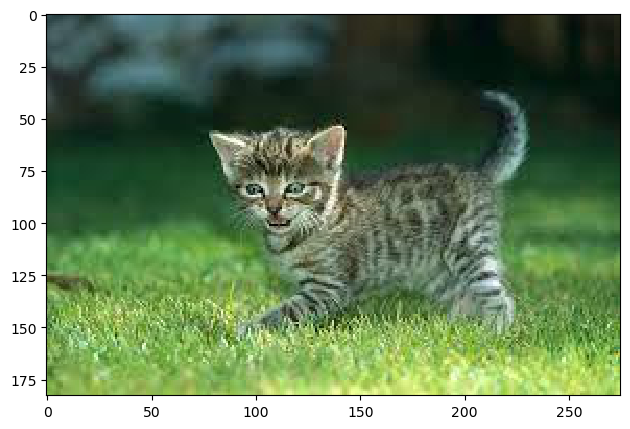

In [74]:
imshow(cat_image_normalized)

In [75]:
cat_image_normalized

array([[[0.25098039, 0.34509804, 0.35294118],
        [0.23137255, 0.3254902 , 0.33333333],
        [0.2       , 0.29411765, 0.30196078],
        ...,
        [0.15294118, 0.16078431, 0.10588235],
        [0.15294118, 0.16078431, 0.10588235],
        [0.15294118, 0.16078431, 0.10588235]],

       [[0.22745098, 0.32156863, 0.32941176],
        [0.21568627, 0.30980392, 0.31764706],
        [0.19215686, 0.28627451, 0.29411765],
        ...,
        [0.15294118, 0.16078431, 0.10588235],
        [0.15294118, 0.16078431, 0.10588235],
        [0.15294118, 0.16078431, 0.10588235]],

       [[0.19607843, 0.29019608, 0.29803922],
        [0.19215686, 0.28627451, 0.29411765],
        [0.18039216, 0.2745098 , 0.28235294],
        ...,
        [0.14509804, 0.15294118, 0.09803922],
        [0.14509804, 0.15294118, 0.09803922],
        [0.14509804, 0.15294118, 0.09803922]],

       ...,

       [[0.4627451 , 0.6627451 , 0.25098039],
        [0.45882353, 0.65882353, 0.25490196],
        [0.48627451, 0

In [76]:
np.array([blue, green, red])

array([[[ 90,  85,  77, ...,  27,  27,  27],
        [ 84,  81,  75, ...,  27,  27,  27],
        [ 76,  75,  72, ...,  25,  25,  25],
        ...,
        [ 64,  65,  70, ...,  85,  99, 111],
        [ 77,  73,  71, ...,  91, 105, 118],
        [ 85,  80,  75, ...,  95, 109, 121]],

       [[ 88,  83,  75, ...,  41,  41,  41],
        [ 82,  79,  73, ...,  41,  41,  41],
        [ 74,  73,  70, ...,  39,  39,  39],
        ...,
        [169, 168, 172, ..., 201, 215, 227],
        [182, 176, 173, ..., 207, 221, 234],
        [190, 183, 177, ..., 210, 224, 236]],

       [[ 64,  59,  51, ...,  39,  39,  39],
        [ 58,  55,  49, ...,  39,  39,  39],
        [ 50,  49,  46, ...,  37,  37,  37],
        ...,
        [118, 117, 124, ..., 164, 178, 190],
        [131, 125, 125, ..., 172, 186, 199],
        [139, 132, 129, ..., 177, 191, 203]]], dtype=uint8)

### Normalized image histogram

In [77]:
red_channel_for_hist = cat_image_normalized[:, :, 0].ravel()
green_channel_for_hist = cat_image_normalized[:, :, 1].ravel()
blue_channel_for_hist = cat_image_normalized[:, :, 2].ravel()

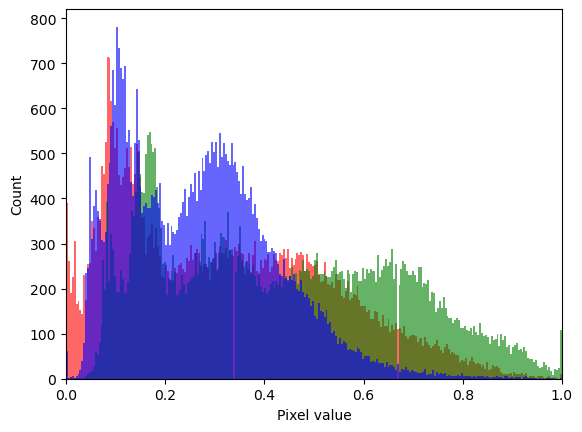

In [78]:
plt.hist(red_channel_for_hist, bins = 256, color = "red", alpha = 0.6)
plt.hist(green_channel_for_hist, bins = 256, color = "green", alpha = 0.6)
plt.hist(blue_channel_for_hist, bins = 256, color = "blue", alpha = 0.6)

plt.xlabel("Pixel value")
plt.ylabel("Count")

plt.xlim(0, 1)
plt.show()

In [79]:
def min_max_normalization(x, min = 0, max = 1):
    return (x - min) / (max - min) # (x - np.min(x)) / (np.max(x) - np.min(x))

# Convolution

In [83]:
conv_filter = np.array([
    [1, 0, 1],
    [0, 1, 0],
    [1, 0, 1]
])

In [87]:
result_image = convolve2d(cat_image[:, :, 0], conv_filter, mode = "same")

In [88]:
result_image.min(), result_image.max()

(0, 1202)

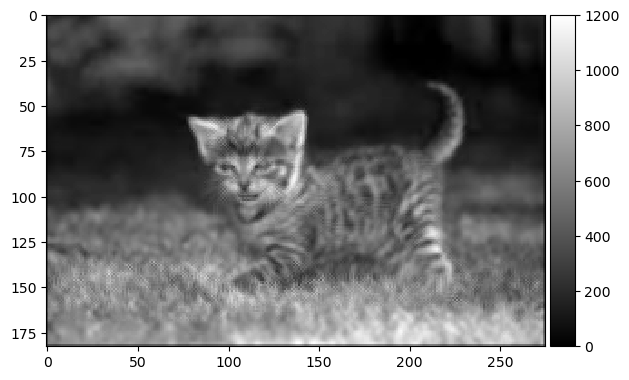

In [89]:
imshow(result_image, cmap = "gray")

In [93]:
# blur filter - all values are 1. It take the mean of the pixels
blur_filter = np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
])

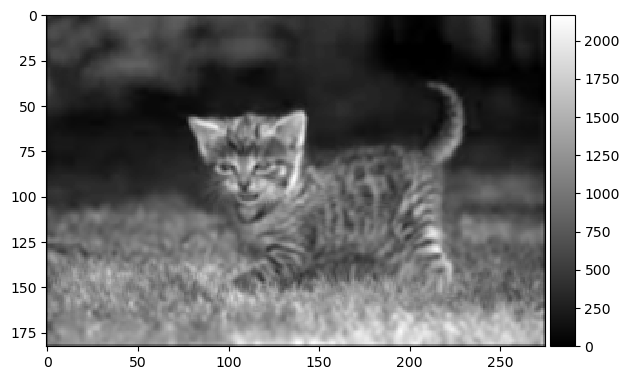

In [95]:
imshow(convolve2d(cat_image[:, :, 0], blur_filter, mode = "same"), cmap = "gray")

In [97]:
# blur filter - more blurred
blur_filter_2 = np.array([
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1],
])

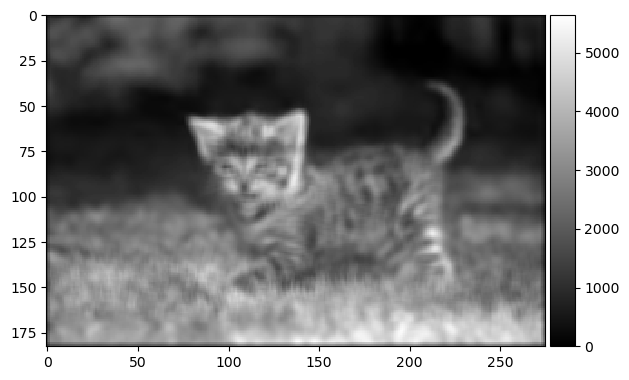

In [98]:
imshow(convolve2d(cat_image[:, :, 0], blur_filter_2, mode = "same"), cmap = "gray")

In [99]:
single_matrix_filter = np.eye(5)

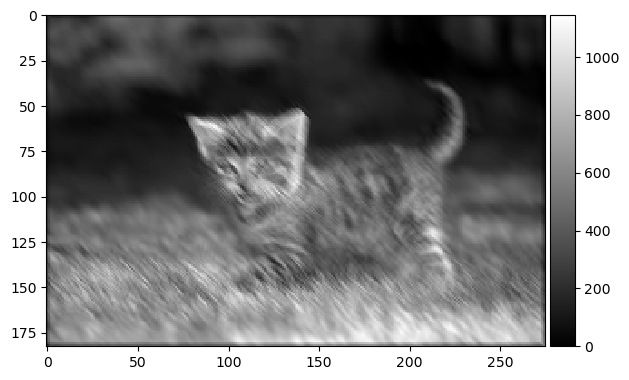

In [100]:
imshow(convolve2d(cat_image[:, :, 0], single_matrix_filter, mode = "same"), cmap = "gray")

In [101]:
secondary_diagonal_matrix_filter = np.array([
    [0, 0, 0, 0, 1],
    [0, 0, 0, 1, 0],
    [0, 0, 1, 0, 0],
    [0, 1, 0, 0, 0],
    [1, 0, 0, 0, 0],
])

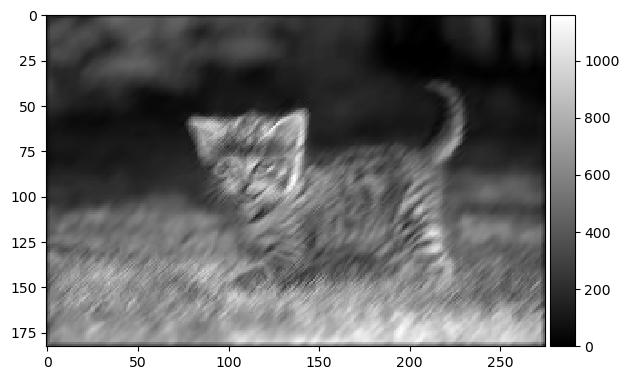

In [102]:
imshow(convolve2d(cat_image[:, :, 0], secondary_diagonal_matrix_filter, mode = "same"), cmap = "gray")

# Image morphology

In [103]:
cat_image_binary = cat_image.copy()

In [104]:
cat_image_binary.mean()

86.89094883258818

In [106]:
cat_image_binary[cat_image_binary < 87] = 0

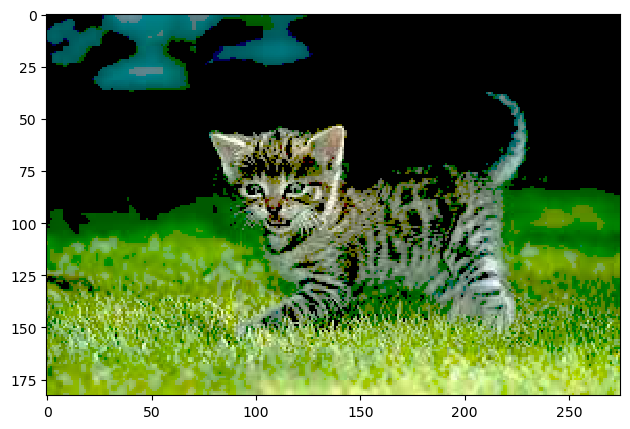

In [107]:
imshow(cat_image_binary, cmap = "gray")

In [110]:
cat_image_binary[cat_image_binary >= 87] = 255

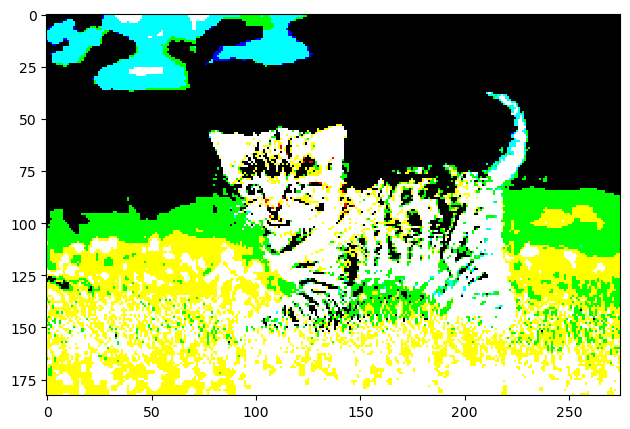

In [111]:
imshow(cat_image_binary, cmap = "gray")

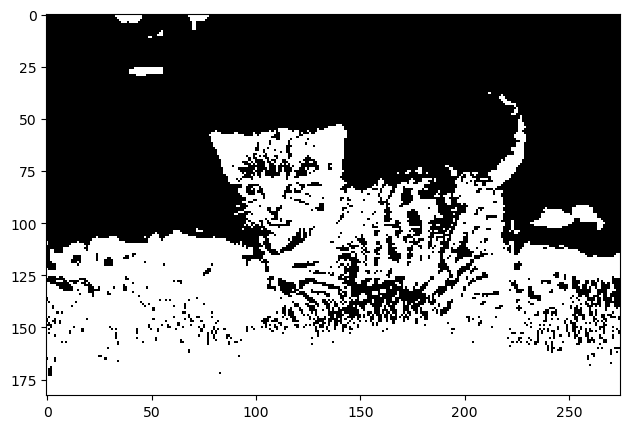

In [112]:
imshow(cat_image_binary[:, :, 0], cmap = "gray")

In [120]:
cat_image_binary_2 = cat_image.copy()

cat_image_binary_2[cat_image_binary_2 <= 50] = 0
cat_image_binary_2[cat_image_binary_2 >= 205] = 255

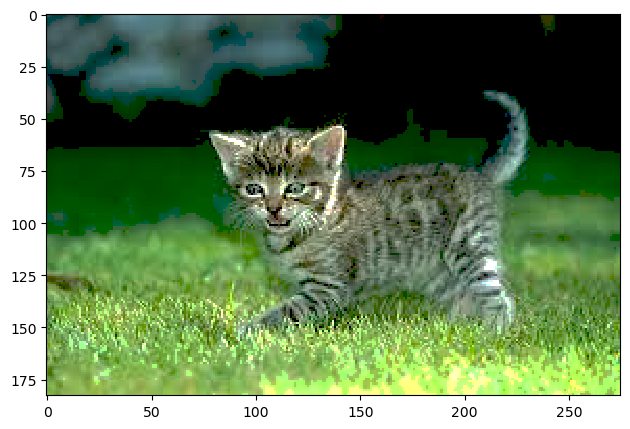

In [121]:
imshow(cat_image_binary_2, cmap = "gray")

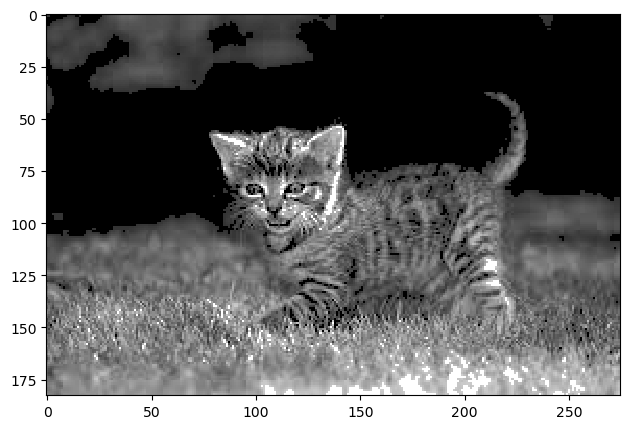

In [122]:
imshow(cat_image_binary_2[:, :, 0], cmap = "gray")
plt.show()

### Otsu threshold

In [124]:
threshold_otsu(cat_image[:, :, 0])

88

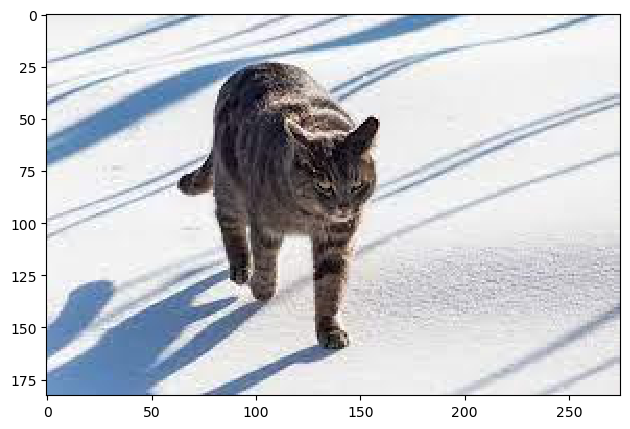

In [126]:
imshow(domestic_cats[57])

In [127]:
threshold_otsu(domestic_cats[57][:, :, 0])

156

In [128]:
cat_image_58 = domestic_cats[57].copy()[:, :, 0]

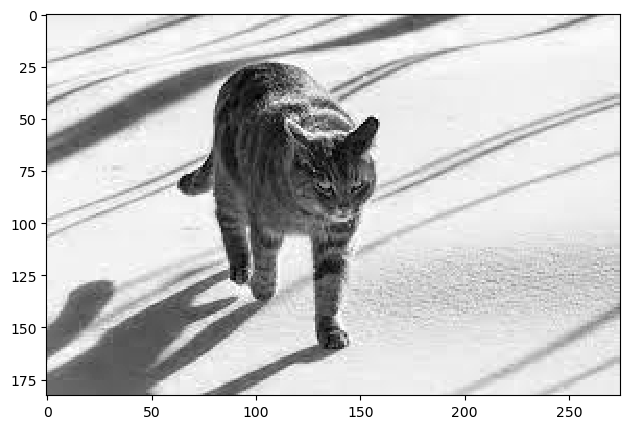

In [130]:
imshow(cat_image_58)

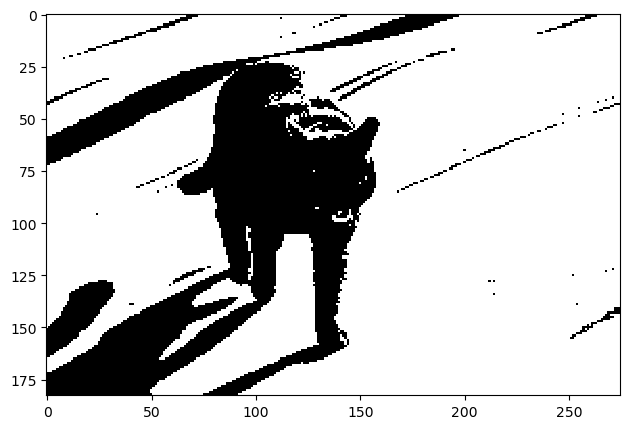

In [131]:
cat_image_58[cat_image_58 <= 156] = 0
cat_image_58[cat_image_58 > 156] = 255

imshow(cat_image_58)

### adding images

In [133]:
result_add_image = domestic_cats[0] + domestic_cats[1]

In [134]:
result_add_image.dtype

dtype('uint8')

In [135]:
result_add_image = domestic_cats[0].astype(int) + domestic_cats[1].astype(int)

In [136]:
result_add_image.dtype

dtype('int32')

In [139]:
result_add_image.min(), result_add_image.max()

(9, 499)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


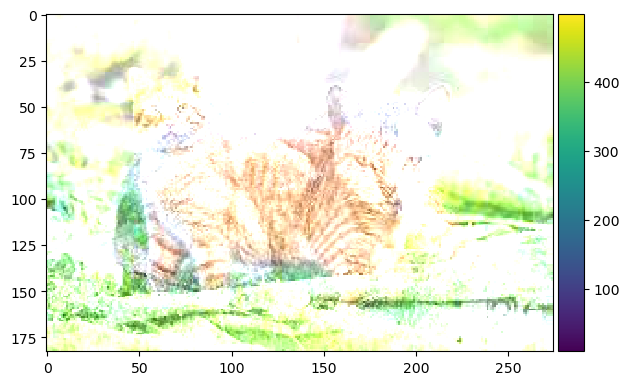

In [138]:
imshow(result_add_image)

In [140]:
result_add_image = 0.5 * domestic_cats[0] + 0.5 * domestic_cats[1]

In [142]:
result_add_image.min(), result_add_image.max() # floats

(4.5, 249.5)

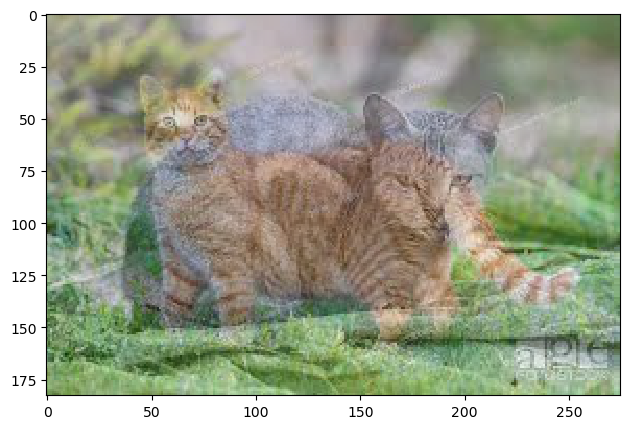

In [141]:
imshow(result_add_image.astype("uint8"))

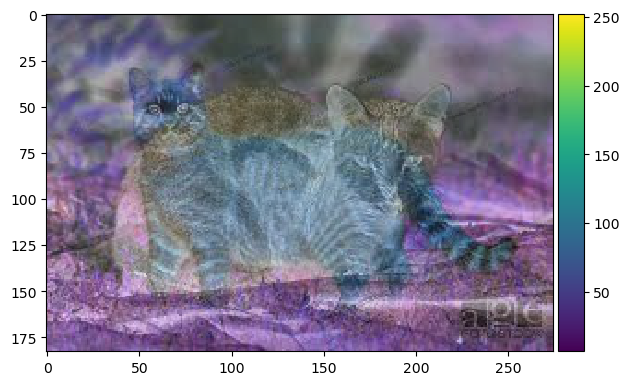

In [145]:
# Negative - lighter -> darker
imshow(256 - result_add_image.astype("uint8"))

### Resizing

In [148]:
resize(cat_image, (500, 500)).shape

(500, 500, 3)

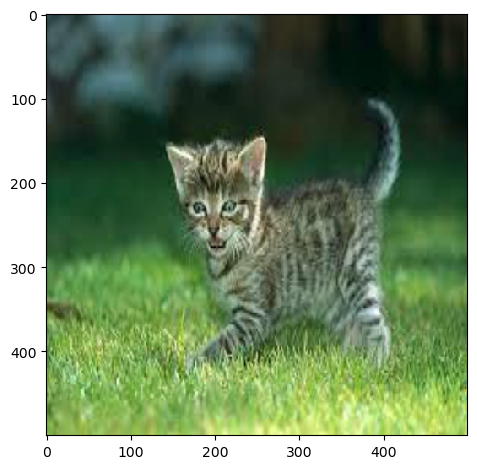

In [149]:
imshow(resize(cat_image, (500, 500)))

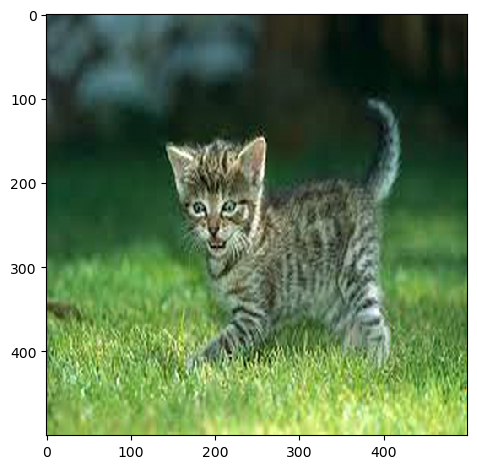

In [152]:
imshow(resize(cat_image, (500, 500), order = 3))

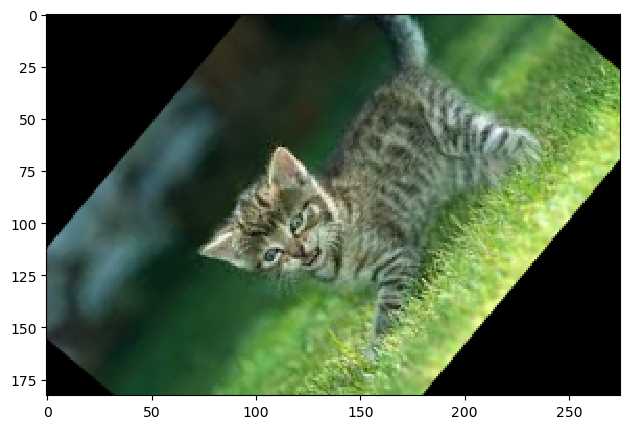

In [151]:
imshow(rotate(cat_image, 50))

In [154]:
fft2(cat_image).shape

(183, 275, 3)

In [155]:
fft2(cat_image[:, :, 0]).shape

(183, 275)

In [157]:
fft2(cat_image[:, :, 0]) # matrix of complex numbers

array([[ 4.09208900e+06      -0.j        ,
        -3.22262915e+05  -64604.31124402j,
         3.88325282e+03  +90480.71114919j, ...,
        -8.75023195e+04 +137436.10755022j,
         3.88325282e+03  -90480.71114919j,
        -3.22262915e+05  +64604.31124402j],
       [ 2.86641655e+05+1245546.77115593j,
         1.07931956e+05   -7246.46947157j,
        -1.41496730e+04 -230360.58851019j, ...,
         2.26238642e+04  -62615.35490966j,
        -6.52676210e+04  +44090.28518723j,
         2.62489123e+05 +164797.03227088j],
       [ 2.85417348e+05 +474722.29392137j,
        -2.40906903e+05  -36504.96299477j,
        -2.02547395e+04  +53681.15672406j, ...,
        -8.80019786e+04  +12475.77416205j,
         1.76889534e+05  -14798.97891804j,
        -2.85603060e+04 -244136.66619311j],
       ...,
       [ 8.33501581e+04 -330039.735409j  ,
         1.82263077e+05  -14936.59440176j,
        -5.66988017e+04  +67062.84336213j, ...,
        -5.79279353e+04  +10164.44829876j,
         3.51962893

In [158]:
np.abs(fftshift(fft2(cat_image[:, :, 0])))

array([[ 781.22425732, 1718.78090166,  959.45972418, ..., 1034.38583407,
        1349.41064473, 2242.15884505],
       [1889.73355801, 1904.84549588, 2264.63635874, ..., 3202.7029241 ,
        1237.40675214, 1302.10983021],
       [2213.13352176,  471.59728923, 1853.83562534, ..., 1470.89125135,
        1525.68082907,  827.88504662],
       ...,
       [ 827.88504662, 1525.68082907, 1470.89125135, ..., 1853.83562534,
         471.59728923, 2213.13352176],
       [1302.10983021, 1237.40675214, 3202.7029241 , ..., 2264.63635874,
        1904.84549588, 1889.73355801],
       [2242.15884505, 1349.41064473, 1034.38583407, ...,  959.45972418,
        1718.78090166,  781.22425732]])

In [159]:
fft_amplitudes = np.abs(fftshift(fft2(cat_image[:, :, 0])))

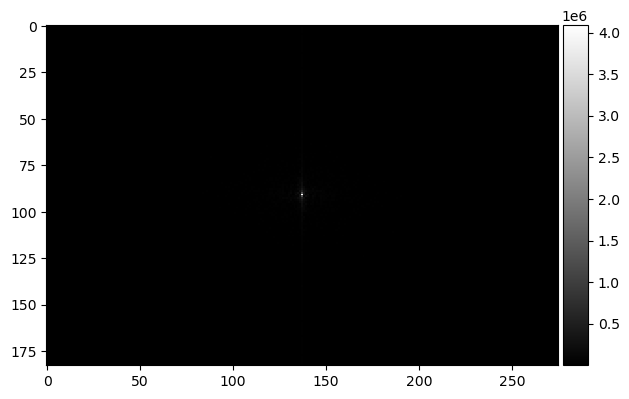

In [162]:
imshow(fft_amplitudes, cmap = "gray")

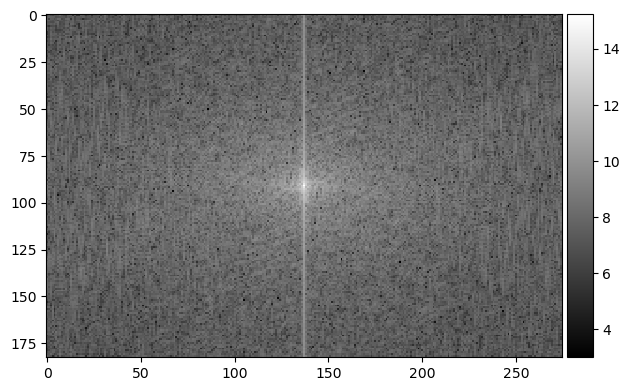

In [164]:
imshow(np.log(fft_amplitudes), cmap = "gray")

In [169]:
hamburger = imread("hamburger.jpg")

In [176]:
image_bytes = hamburger.tobytes()
df = pd.DataFrame({'image_data': [image_bytes]})
memory_usage = df.memory_usage(deep=True)
memory_usage

Index            132
image_data    783167
dtype: int64

In [177]:
hamburger.shape

(417, 626, 3)

In [178]:
417 * 626 * 3

783126

In [183]:
red_channel_for_hist = hamburger[:, :, 0].mean()
green_channel_for_hist = hamburger[:, :, 1].mean()
blue_channel_for_hist = hamburger[:, :, 2].mean()

In [184]:
red_channel_for_hist, green_channel_for_hist, blue_channel_for_hist

(90.08790156373304, 84.07082002129926, 36.792577439645726)

In [179]:
circles = imread("circles.png")

In [181]:
red_channel_for_hist = circles[:, :, 0].ravel()
green_channel_for_hist = circles[:, :, 1].ravel()
blue_channel_for_hist = circles[:, :, 2].ravel()

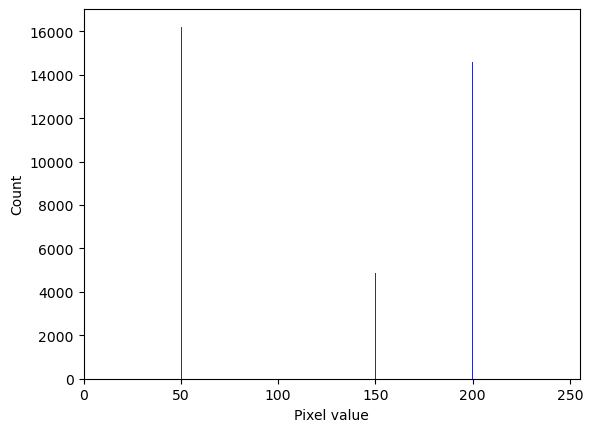

In [182]:
plt.hist(red_channel_for_hist, bins = 256, color = "red", alpha = 0.6)
plt.hist(green_channel_for_hist, bins = 256, color = "green", alpha = 0.6)
plt.hist(blue_channel_for_hist, bins = 256, color = "blue", alpha = 0.6)

plt.xlabel("Pixel value")
plt.ylabel("Count")

plt.xlim(0, 255)
plt.show()

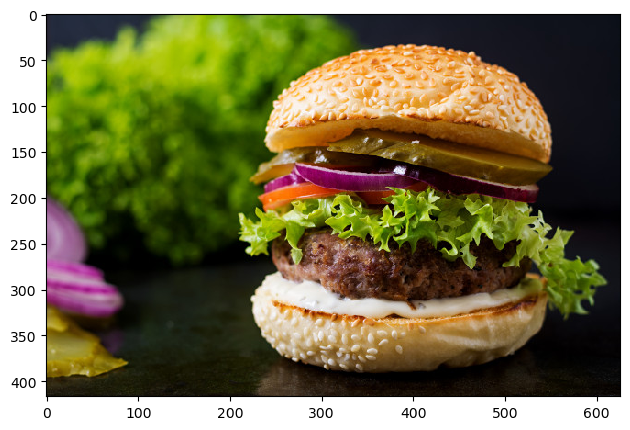

In [188]:
imshow(hamburger)

In [185]:
conv_filter = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

In [190]:
result_image = convolve2d(hamburger[:, :, 0], conv_filter, mode = "same")

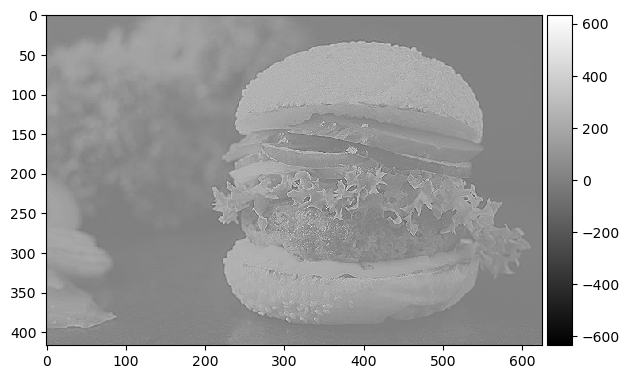

In [187]:
imshow(result_image, cmap = "gray")

In [191]:
binary_filter = np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
])

In [192]:
result_image = convolve2d(hamburger[:, :, 2], binary_filter, mode = "same")

In [193]:
result_image

array([[203, 309, 321, ..., 139, 135,  88],
       [306, 465, 482, ..., 208, 201, 130],
       [308, 467, 483, ..., 208, 200, 128],
       ...,
       [ 93, 157, 168, ...,  51,  54,  36],
       [ 96, 161, 173, ..., 113, 115,  75],
       [ 51,  87,  95, ...,  99, 100,  64]])

C:\Users\diton\anaconda3\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:149: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


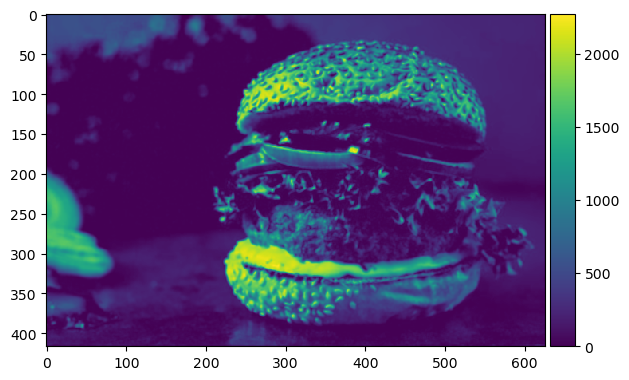

In [194]:
imshow(result_image)

In [197]:
result_image[result_image == 255].size

227

In [198]:
np.sum(result_image == 255)

227